In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## data import

In [2]:
project_path = "/home/leon/Projects/Canvas/4Bai-05-21/Capstone/BAH/"

In [3]:
sensor_colnames = [f"sensor{i}" for i in range(1,22, 1)] #[f"sensor{i}" for i in range(1,22, 1)] 22

In [4]:
engine_colnames = ["unit_number", "cycles", "operational_setting_1", "operational_setting_2", "operational_setting_3"] + sensor_colnames

In [ ]:
print(engine_colnames)

In [5]:
train_fd001_raw = pd.read_csv(f"{project_path}CMAPSSData/train_FD001.txt", delim_whitespace=True, names=engine_colnames)
train_fd002_raw = pd.read_csv(f"{project_path}CMAPSSData/train_FD002.txt", delim_whitespace=True, names=engine_colnames)
train_fd003_raw = pd.read_csv(f"{project_path}CMAPSSData/train_FD003.txt", delim_whitespace=True, names=engine_colnames)
train_fd004_raw = pd.read_csv(f"{project_path}CMAPSSData/train_FD004.txt", delim_whitespace=True, names=engine_colnames)

In [6]:
test_fd001_raw = pd.read_csv(f"{project_path}CMAPSSData/test_FD001.txt", delim_whitespace=True, names=engine_colnames)
test_fd002_raw = pd.read_csv(f"{project_path}CMAPSSData/test_FD002.txt", delim_whitespace=True, names=engine_colnames)
test_fd003_raw = pd.read_csv(f"{project_path}CMAPSSData/test_FD003.txt", delim_whitespace=True, names=engine_colnames)
test_fd004_raw = pd.read_csv(f"{project_path}CMAPSSData/test_FD004.txt", delim_whitespace=True, names=engine_colnames)

In [7]:
rul_fd001_raw = pd.read_csv(f"{project_path}CMAPSSData/RUL_FD001.txt", names=["rul_fd001"], squeeze=True)
rul_fd002_raw = pd.read_csv(f"{project_path}CMAPSSData/RUL_FD002.txt", names=["rul_fd002"], squeeze=True)
rul_fd003_raw = pd.read_csv(f"{project_path}CMAPSSData/RUL_FD003.txt", names=["rul_fd003"], squeeze=True)
rul_fd004_raw = pd.read_csv(f"{project_path}CMAPSSData/RUL_FD004.txt", names=["rul_fd004"], squeeze=True)

## Target inspection

In [ ]:
rul_fd001_raw.describe()

In [ ]:
rul_fd001_raw.head(2)

In [ ]:
rul_fd002_raw.head(2)

In [ ]:
rul_fd003_raw.head(2)

In [ ]:
rul_fd004_raw.head(2)

## Training set inspection

In [ ]:
train_fd001_raw.info()

In [ ]:
train_fd001_raw.head(2)

In [ ]:
train_fd001_raw.loc[0]

In [ ]:
train_fd002_raw.head(2)

In [ ]:
train_fd003_raw.head(2)

In [ ]:
train_fd004_raw.head(2)

In [ ]:
test_fd001_raw.info()

In [ ]:
test_fd001_raw.head(2)

In [ ]:
test_fd002_raw.head(2)

In [ ]:
test_fd003_raw.head(2)

In [ ]:
test_fd004_raw.head(2)

## RUL set inspection

In [23]:
rul_df = pd.DataFrame({"rul_fd001": rul_fd001_raw, "rul_fd002": rul_fd002_raw, "rul_fd003": rul_fd003_raw, "rul_fd004": rul_fd004_raw}, dtype=np.int)

## Assumptions

- data in rul_ are useful life of a particular unit
- unit number and trejectories are synonyms
- data in rul_ are ordered by thier unit number

In [24]:
rul_df["unit_number"] = list(range(1, rul_df.shape[0] + 1))

In [25]:
cols = rul_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
rul_df = rul_df[cols]

In [26]:
rul_df = rul_df.set_index("unit_number")

In [ ]:
#rul_df.head(3)

## Data Transformation

In [8]:
train_fd001 = train_fd001_raw.copy()
train_fd002 = train_fd002_raw.copy()
train_fd003 = train_fd003_raw.copy()
train_fd004 = train_fd004_raw.copy()

In [ ]:
train_fd001.head(3)

In [12]:
train_fd001["ttf"] = train_fd001.groupby(["unit_number"], group_keys=False).apply(lambda g: max(g.cycles) - g.cycles)
train_fd002["ttf"] = train_fd002.groupby(["unit_number"], group_keys=False).apply(lambda g: max(g.cycles) - g.cycles)
train_fd003["ttf"] = train_fd003.groupby(["unit_number"], group_keys=False).apply(lambda g: max(g.cycles) - g.cycles)
train_fd004["ttf"] = train_fd004.groupby(["unit_number"], group_keys=False).apply(lambda g: max(g.cycles) - g.cycles)

In [14]:
train_fd004[train_fd004.unit_number == 1]

,unit_number,cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,ttf
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1,317,0.0014,0.0014,100.0,518.67,643.45,1599.21,1416.74,14.62,...,2388.47,8184.95,8.2760,0.03,396,2388,100.00,39.58,23.6562,4
317,1,318,10.0046,0.2500,100.0,489.05,605.56,1509.31,1324.42,10.52,...,2388.74,8179.79,8.4656,0.03,374,2319,100.00,28.77,17.4422,3
318,1,319,10.0009,0.2520,100.0,489.05,605.29,1512.36,1317.11,10.52,...,2388.81,8177.70,8.4545,0.03,373,2319,100.00,28.87,17.4126,2
319,1,320,20.0060,0.7002,100.0,491.19,607.24,1496.88,1266.21,9.35,...,2388.87,8108.60,9.0019,0.03,368,2324,100.00,24.90,15.0215,1


In [15]:
train_fd001["condition_fault_mode"] = "fd001"
train_fd002["condition_fault_mode"] = "fd002"
train_fd003["condition_fault_mode"] = "fd003"
train_fd004["condition_fault_mode"] = "fd004"

In [16]:
train = pd.concat([train_fd001, train_fd002, train_fd003, train_fd004], axis=0)

In [ ]:
train.info()

,unit_number,cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,ttf,condition_fault_mode
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,fd001
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,fd001


,unit_number,cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,ttf,condition_fault_mode
61247,249,254,35.0046,0.84,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,1,fd004
61248,249,255,42.0030,0.84,100.0,445.00,549.85,1369.75,1147.45,3.91,...,8144.33,9.1207,0.02,333,2212,100.0,10.66,6.4341,0,fd004


In [19]:
train = train.set_index(["unit_number", "cycles"])

In [20]:
train.head(2)

operational_setting_1  operational_setting_2  \
unit_number cycles                                                 
1           1                     -0.0007                -0.0004   
            2                      0.0019                -0.0003   

                    operational_setting_3  sensor1  sensor2  sensor3  sensor4  \
unit_number cycles                                                              
1           1                       100.0   518.67   641.82  1589.70  1400.60   
            2                       100.0   518.67   642.15  1591.82  1403.14   

                    sensor5  sensor6  sensor7  ...  sensor14  sensor15  \
unit_number cycles                             ...                       
1           1         14.62    21.61   554.36  ...   8138.62    8.4195   
            2         14.62    21.61   553.75  ...   8131.49    8.4318   

                    sensor16  sensor17  sensor18  sensor19  sensor20  \
unit_number cycles                                                     
1           1           0.03       392      2388     100.0     39.06   
            2           0.03       392      2388     100.0     39.00   

                    sensor21  ttf  condition_fault_mode  
unit_number cycles                                       
1           1        23.4190  191                 fd001  
            2        23.4236  190                 fd001  

[2 rows x 26 columns]

In [21]:
train.tail(2)

operational_setting_1  operational_setting_2  \
unit_number cycles                                                 
249         254                   35.0046                   0.84   
            255                   42.0030                   0.84   

                    operational_setting_3  sensor1  sensor2  sensor3  sensor4  \
unit_number cycles                                                              
249         254                     100.0   449.44   555.77  1381.29  1148.18   
            255                     100.0   445.00   549.85  1369.75  1147.45   

                    sensor5  sensor6  sensor7  ...  sensor14  sensor15  \
unit_number cycles                             ...                       
249         254        5.48     7.96   199.93  ...   8125.64    9.0515   
            255        3.91     5.69   142.47  ...   8144.33    9.1207   

                    sensor16  sensor17  sensor18  sensor19  sensor20  \
unit_number cycles                                                     
249         254         0.02       337      2223     100.0     15.26   
            255         0.02       333      2212     100.0     10.66   

                    sensor21  ttf  condition_fault_mode  
unit_number cycles                                       
249         254       9.0774    1                 fd004  
            255       6.4341    0                 fd004  

[2 rows x 26 columns]

In [22]:
train

operational_setting_1  operational_setting_2  \
unit_number cycles                                                 
1           1                     -0.0007                -0.0004   
            2                      0.0019                -0.0003   
            3                     -0.0043                 0.0003   
            4                      0.0007                 0.0000   
            5                     -0.0019                -0.0002   
...                                   ...                    ...   
249         251                    9.9998                 0.2500   
            252                    0.0028                 0.0015   
            253                    0.0029                 0.0000   
            254                   35.0046                 0.8400   
            255                   42.0030                 0.8400   

                    operational_setting_3  sensor1  sensor2  sensor3  sensor4  \
unit_number cycles                                                              
1           1                       100.0   518.67   641.82  1589.70  1400.60   
            2                       100.0   518.67   642.15  1591.82  1403.14   
            3                       100.0   518.67   642.35  1587.99  1404.20   
            4                       100.0   518.67   642.35  1582.79  1401.87   
            5                       100.0   518.67   642.37  1582.85  1406.22   
...                                   ...      ...      ...      ...      ...   
249         251                     100.0   489.05   605.33  1516.36  1315.28   
            252                     100.0   518.67   643.42  1598.92  1426.77   
            253                     100.0   518.67   643.68  1607.72  1430.56   
            254                     100.0   449.44   555.77  1381.29  1148.18   
            255                     100.0   445.00   549.85  1369.75  1147.45   

                    sensor5  sensor6  sensor7  ...  sensor14  sensor15  \
unit_number cycles                             ...                       
1           1         14.62    21.61   554.36  ...   8138.62    8.4195   
            2         14.62    21.61   553.75  ...   8131.49    8.4318   
            3         14.62    21.61   554.26  ...   8133.23    8.4178   
            4         14.62    21.61   554.45  ...   8133.83    8.3682   
            5         14.62    21.61   554.00  ...   8133.80    8.4294   
...                     ...      ...      ...  ...       ...       ...   
249         251       10.52    15.46   404.59  ...   8185.69    8.4541   
            252       14.62    21.57   567.59  ...   8185.47    8.2221   
            253       14.62    21.57   569.04  ...   8193.94    8.2525   
            254        5.48     7.96   199.93  ...   8125.64    9.0515   
            255        3.91     5.69   142.47  ...   8144.33    9.1207   

                    sensor16  sensor17  sensor18  sensor19  sensor20  \
unit_number cycles                                                     
1           1           0.03       392      2388     100.0     39.06   
            2           0.03       392      2388     100.0     39.00   
            3           0.03       390      2388     100.0     38.95   
            4           0.03       392      2388     100.0     38.88   
            5           0.03       393      2388     100.0     38.90   
...                      ...       ...       ...       ...       ...   
249         251         0.03       372      2319     100.0     29.11   
            252         0.03       396      2388     100.0     39.38   
            253         0.03       395      2388     100.0     39.78   
            254         0.02       337      2223     100.0     15.26   
            255         0.02       333      2212     100.0     10.66   

                    sensor21  ttf  condition_fault_mode  
unit_number cycles                                       
1           1        23.4190  191                 fd001  
       

## EDA

In [ ]:
rul_df.head(2)

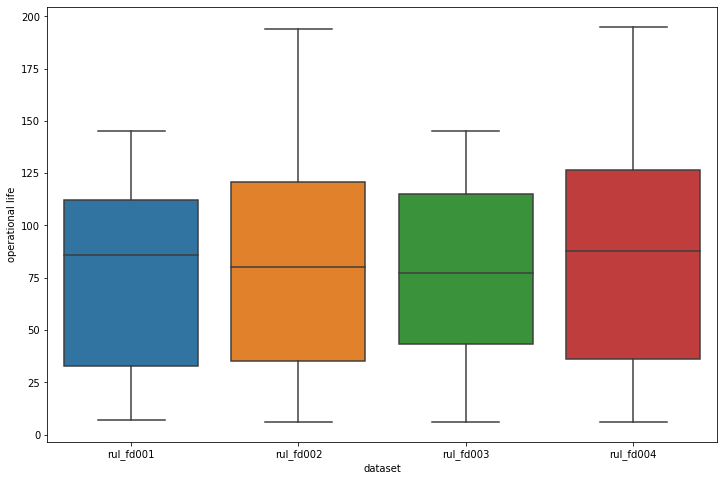

In [27]:
fig=plt.figure(figsize=(12, 8))
ax = sns.boxplot(data = rul_df);
ax.set_xlabel("dataset");
ax.set_ylabel("operational life");

In [ ]:
#sns.relplot(data = train_fd001_raw.loc[:, ["unit_number", "cycles", "operational_setting_1", "operational_setting_2"]], hue="unit_number", kind = "line")

In [ ]:
# UNIT 1
train_fd001.loc[100]

In [ ]:
#train_fd001.loc[1].loc[:, ["operational_setting_1" , "operational_setting_2"]]

In [ ]:
# plot operational setting for first unit
sns.lineplot(data= train_fd001.loc[1].loc[:, ["operational_setting_1", "operational_setting_2"]]);
ax2 = plt.twinx()
sns.lineplot(data= train_fd001.loc[1].loc[:, ["operational_setting_3"]], ax=ax2);

In [ ]:
sensor_cols = [col for col in train_fd001.columns if 'sensor' in col]

In [ ]:
sns.lineplot(data= train_fd001.loc[1].loc[:, sensor_cols]);

In [ ]:
train_fd001.loc[1].loc[:, sensor_cols]

In [ ]:
train_fd001_raw.head(2)

In [ ]:
test_fd003_raw.loc[0] 

In [ ]:
test_fd003_raw